# Desafio Cientista de Dados

## Introdução

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

### Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma **análise exploratória dos dados** de seu maior concorrente, assim como um **teste de validação de um modelo preditivo**.

Seu objetivo é desenvolver um **modelo de previsão de preços** a partir do dataset oferecido, e **avaliar** tal modelo utilizando as **métricas de avaliação que mais fazem sentido para o problema**. O uso de **outras fontes de dados** além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

### Entregas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. **Seja criativo!**

2. Responda também às seguintes perguntas:
    - Supondo que uma pessoa esteja pensando em investir em um **apartamento para alugar** na plataforma, **onde seria mais indicada a compra**?
    - O **número mínimo de noites** e a **disponibilidade** ao longo do ano **interferem no preço**?
    - Existe algum **padrão no texto do nome do local** para **lugares de mais alto valor**?

3. Explique **como você faria a previsão do preço a partir dos dados**. Quais **variáveis** e/ou suas **transformações** você utilizou e **por quê**? Qual **tipo de problema** estamos resolvendo (regressão, classificação)? Qual **modelo melhor se aproxima dos dados** e quais seus **prós e contras**? Qual **medida de performance** do modelo foi **escolhida** e **por quê**?

4. Supondo um apartamento com as seguintes características, **qual seria a sua sugestão de preço**?:

        {'id': 2595,
        'nome': 'Skylit Midtown Castle',
        'host_id': 2845,
        'host_name': 'Jennifer',
        'bairro_group': 'Manhattan',
        'bairro': 'Midtown',
        'latitude': 40.75362,
        'longitude': -73.98377,
        'room_type': 'Entire home/apt',
        'minimo_noites': 1,
        'numero_de_reviews': 45,
        'ultima_review': '2019-05-21',
        'reviews_por_mes': 0.38,
        'calculado_host_listings_count': 2,
        'disponibilidade_365': 355}

5. **Salve o modelo desenvolvido** no formato .pkl. 

6. A entrega deve ser feita através de um *repositório de código público* que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.

7. Um vídeo curto explicando o desenvolvimento de suas entregas deste desafio, como você planejou e executou as atividades propostas. O vídeo deverá ser entregue via link via Google Drive. Lembre-se de autorizar o acesso para "qualquer pessoa com o link".

Todos os códigos produzidos devem seguir as boas práticas de codificação.

### Prazo

Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio. O não cumprimento deste prazo implica na desclassificação do processo seletivo.
A Indicium possui ferramentas avançadas de detecção de plágio e inteligência artificial. A utilização de IA implica na desclassificação do processo seletivo.

Envie o seu relatório dentro da sua data limite para o email: **selecao.lighthouse@indicium.tech**

O arquivo de entrega deve ser nomeado como: **LH_CD_SEUNOME**

Bom trabalho!

## Dicionário dos dados

A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado (Burgo)
- bairro - Contém o nome da área onde o anúncio está localizado (Bairro)
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Desafio:

### Imports

In [2]:
import pandas as pd
import numpy as np
import sklearn
from math import log10
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #, MinMaxScaler

#from scipy import stats
#from scipy.stats import wilcoxon

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from random import randint
import logging
#from imblearn.over_sampling import SMOTE

# Regressão
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import graphviz

# Avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import StackingClassifier

### Análise inicial do dataset

In [411]:
df = pd.read_csv('teste_indicium_precificacao.csv')

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [394]:
df.isna().any()

id                               False
nome                              True
host_id                          False
host_name                         True
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
price                            False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
dtype: bool

In [413]:
df.drop(columns=['id','host_id']).describe() # os ids não são úteis aqui 

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [415]:
# testar se as instâncias nulas de ultima_review tbm possuem reviews_por_mes nulas
print((df['ultima_review'].isna() | df['reviews_por_mes'].isna()).sum() == (df['ultima_review'].isna() & df['reviews_por_mes'].isna()).sum())

# verificar se todas as instâncias que não possuem nenhuma review são 
# exatamente as mesmas que possuem ultima_review e reviews_por_mes
((df['numero_de_reviews']==0) == (df['ultima_review'].isna() & df['reviews_por_mes'].isna())).all()

True


True

Logo, todas as instâncias sem reviews possuem os atributos ```ultima_review = NaN``` e ```reviews_por_mes = NaN```.

### Novo dataset


Identifiquei que este dataset é um dataset de com informações de aluguéis pelo airbnb em Nova York até 2019. Como os dados são abertos para coleta pelo site [Inside Airbnb](https://insideairbnb.com), decidi coletar dados atualizados para análise. Este dataset extra foi compartilhado em 4 de Novembro de 2024 e está disponível para download em https://insideairbnb.com/get-the-data/.

In [412]:
df_new = pd.read_csv('listings.csv')

df_new.rename(columns={'name': 'nome', 
                       'neighbourhood_group': 'bairro_group', 
                       'neighbourhood': 'bairro',
                       'minimum_nights': 'minimo_noites',
                       'calculated_host_listings_count': 'calculado_host_listings_count',
                       'availability_365': 'disponibilidade_365',
                       'number_of_reviews': 'numero_de_reviews',
                       'last_review': 'ultima_review',
                       'reviews_per_month': 'reviews_por_mes'}, inplace=True) # trocando nomes das colunas para o merge

# retirando instâncias com o preço de aluguel faltando
# e colunas extras que não se encaixavam
df_new = df_new.drop(index=df_new[df_new['price'].isna()].index, columns=['license', 'number_of_reviews_ltm'])

df_new.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,83.0,30,195,2024-10-05,1.04,1,185
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.03,2,83
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,71.0,30,250,2024-10-31,1.37,1,284
5,7097,"Perfect for Your Parents, With Garden & Patio",17571,Jane,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,390,2024-10-27,2.16,2,215


In [382]:
df_new.isna().any()

id                               False
nome                             False
host_id                          False
host_name                        False
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
price                            False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
dtype: bool

In [395]:
DOUBLE = len(pd.merge(df, df_new, how='inner', left_on='id', right_on='id'))
print(len(df_new)-DOUBLE, DOUBLE)

18639 4102


Com isso, poderei adicionar 18639 instâncias novas e atualizar 4102 instâncias já existentes.

In [396]:
teste = pd.merge(df, df_new, how='inner', left_on='id', right_on='id')

In [397]:
# verificando se houve "desatualização" de informações das reviews do dataset antigo para o novo
ult_mask = teste['ultima_review_x'].notna() & teste['ultima_review_y'].isna()
rpm_mask = teste['reviews_por_mes_x'].notna() & teste['reviews_por_mes_y'].isna()

if(ult_mask.sum().any()):
    print(teste[ult_mask].index)
if(rpm_mask.any()):
    print(teste[rpm_mask].index)

teste.loc[ult_mask | rpm_mask, 
          ['id', 'numero_de_reviews_x', 'numero_de_reviews_y', 'ultima_review_x', 'ultima_review_y', 'reviews_por_mes_x', 'reviews_por_mes_y']].head()

Index([389, 486, 2239, 3052], dtype='int64')
Index([389, 486, 2239, 3052], dtype='int64')


,id,numero_de_reviews_x,numero_de_reviews_y,ultima_review_x,ultima_review_y,reviews_por_mes_x,reviews_por_mes_y
389,887355,1,0,2015-03-25,NaN,0.02,NaN
486,1291020,1,0,2019-06-19,NaN,1.00,NaN
2239,17974244,1,0,2018-05-12,NaN,0.07,NaN
3052,25904988,1,0,2018-07-21,NaN,0.08,NaN


Preciso ter cuidado apenas para não "desatualizar" a data da última review. Já com a quantidade de reviews por mês, faria mais sentido mudar os valores nulos desses casos para 0, já que suas última review foram a tanto tempo atrás, que o número de reviews por mes deve ter chegado a 0, sendo registrado como um valor nulo.

In [398]:
lost_reviews = teste.loc[ult_mask, ['id', 'ultima_review_x', 'reviews_por_mes_y']].fillna(0).set_index('id')
lost_reviews.columns = ['ultima_review', 'reviews_por_mes']
lost_reviews

,ultima_review,reviews_por_mes
id,,
887355,2015-03-25,0.0
1291020,2019-06-19,0.0
17974244,2018-05-12,0.0
25904988,2018-07-21,0.0


In [399]:
# Verificar se há id's repetidos antes de juntar os dataframes 
print((df['id'].value_counts() > 1).any())
(df_new['id'].value_counts() > 1).any()

False


False

In [ ]:
df_old = df # apenas caso precise em testes futuros
df.set_index('id', inplace=True)
df_new.set_index('id', inplace=True)

# atualiza os dados antigos
df.update(df_new) 

# adiciona os novos dados e retira os usados na atualização
df = pd.concat([df, df_new.drop(index=lost_reviews.index)]) # se não tirar aquelas reviews "perdidas", elas não vão ser consideradas duplicatas a serem retiradas

df.reset_index(inplace=True)  # to recover the initial structure
df = df.drop_duplicates() # tira duplicatas

df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809020,-73.941900,Private room,150.0,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.798510,-73.943990,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.747670,-73.975000,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71626,1281096465598617765,"Furnished room in Bensonhurst, only for girls #23",3223938,Eugene,Brooklyn,Bensonhurst,40.612310,-73.980300,Private room,28.0,30,0,NaN,NaN,740,336
71627,1281230979116575465,Luxury Reno'd Designer Townhome,43042852,Joshua,Brooklyn,Bedford-Stuyvesant,40.684703,-73.957000,Entire home/apt,475.0,30,0,NaN,NaN,1,32
71628,1281263542832791722,Modern new 1 bed w/ rooftop,23297442,Amira,Brooklyn,Bedford-Stuyvesant,40.686559,-73.922157,Entire home/apt,162.0,30,0,NaN,NaN,1,124
71629,1281431427554747842,Beautiful 1 Bedroom Condo,530889967,Maria,Bronx,Port Morris,40.806013,-73.927053,Entire home/apt,250.0,30,0,NaN,NaN,1,364


## Análise dos dados

In [401]:
df.loc[df['price']>=1000, ['bairro']].value_counts()

bairro         
Midtown            84
Upper West Side    48
Upper East Side    37
Tribeca            31
West Village       30
                   ..
Columbia St         1
City Island         1
Brighton Beach      1
Bayside             1
Woodside            1
Name: count, Length: 76, dtype: int64

In [402]:
df['bairro_group'].value_counts()

bairro_group
Manhattan        30087
Brooklyn         26374
Queens            8553
Bronx             1887
Staten Island      632
Name: count, dtype: int64

In [420]:
df.drop(columns=['id','host_id']).describe() # os ids não são úteis aqui 

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,67533.000000,67533.000000,67533.000000,67533.000000,67533.000000,51131.000000,67533.000000,67533.000000
mean,40.728715,-73.950113,173.767255,13.550842,25.373358,1.304219,30.125539,150.670265
std,0.055448,0.050398,297.956149,22.940821,54.918190,1.884584,125.944795,139.307766
min,40.499790,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.689230,-73.983400,70.000000,2.000000,1.000000,0.190000,1.000000,0.000000
50%,40.724110,-73.955400,120.000000,3.000000,5.000000,0.640000,1.000000,121.000000
75%,40.762910,-73.932540,199.000000,30.000000,24.000000,1.880000,3.000000,298.000000
max,40.913060,-73.713650,20000.000000,1250.000000,2165.000000,111.790000,897.000000,365.000000


In [419]:
df.isna().any()

id                               False
nome                              True
host_id                          False
host_name                         True
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
price                            False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
dtype: bool

In [ ]:
# como devo transformar as instâncias nulas? Faz sentido trocar a nota da reviews por algo similar aos parecidos,
# mas com o número de reviews por mês faria mais sentido substituir por 0... Será que atrapalharia no julgamento?

df

In [421]:
df['price'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

count    67533.000000
mean       173.767255
std        297.956149
min          0.000000
10%         50.000000
20%         65.000000
30%         80.000000
40%         99.000000
50%        120.000000
60%        149.000000
70%        175.000000
80%        225.000000
90%        316.000000
95%        438.000000
99%        949.680000
max      20000.000000
Name: price, dtype: float64

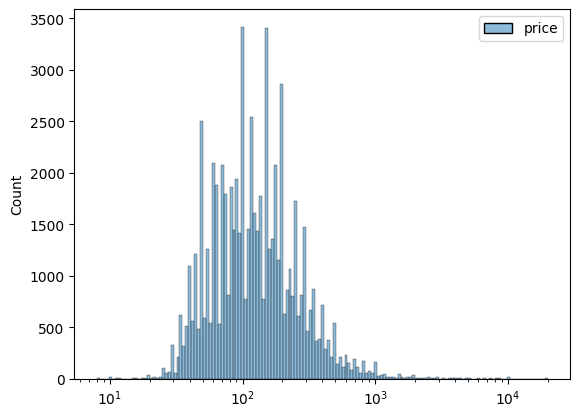

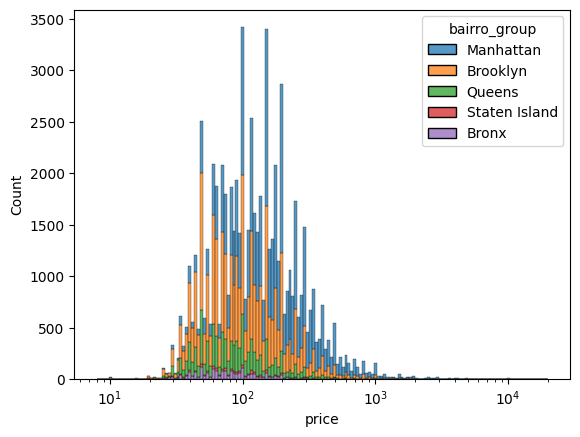

In [455]:
sns.histplot(df[['price']], log_scale=True)
plt.show()
sns.histplot(df,x='price', hue='bairro_group', log_scale=True, multiple='stack')
plt.show()

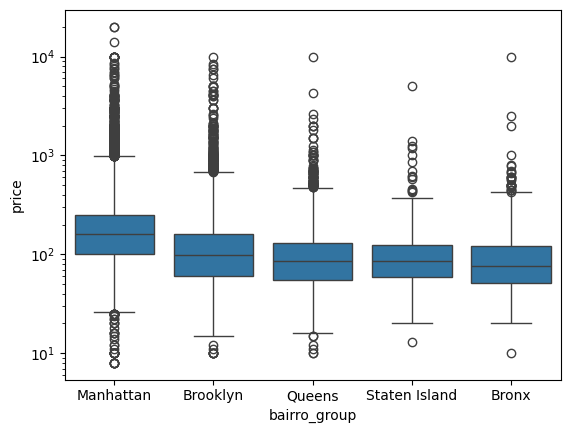

In [441]:
sns.boxplot(df,y='price', x='bairro_group', log_scale=True)
plt.show()

In [449]:
df[['price','bairro_group']].groupby(by='bairro_group').aggregate(['median', 'mean', 'min', 'max'])

price                           
              median        mean   min      max
bairro_group                                   
Bronx           76.0  109.025967   0.0   9994.0
Brooklyn        99.0  138.284219   0.0  10000.0
Manhattan      159.0  227.187058   0.0  20000.0
Queens          85.0  113.380217  10.0  10000.0
Staten Island   85.5  121.939873  13.0   5000.0

Manhattan parece possuir custo de hospedagens maiores do que os outros burgos, enquanto o Bronx parece ser o menos custoso. (fazer mann-whitney) 

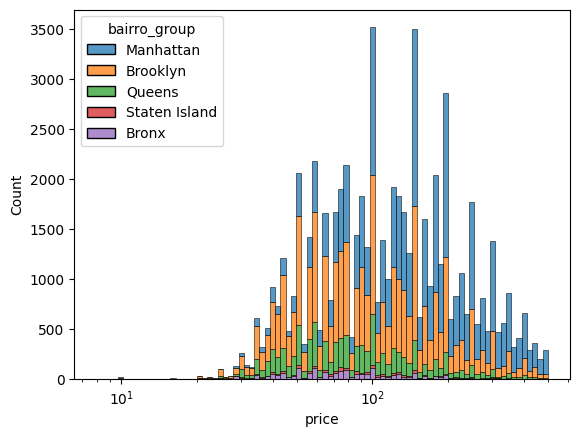

In [454]:
sns.histplot(df[df['price']<500],x='price', hue='bairro_group', log_scale=True, multiple='stack')
plt.show()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

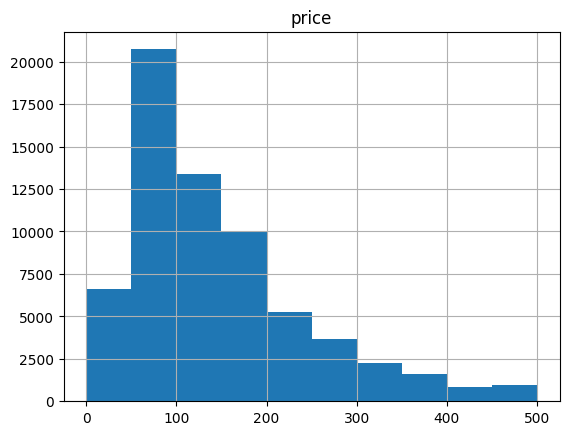

In [456]:
df.loc[df['price'] <= 500, ['price']].hist()

In [45]:
len(df[df['price'] >= 500])

1235

<Axes: xlabel='longitude', ylabel='latitude'>

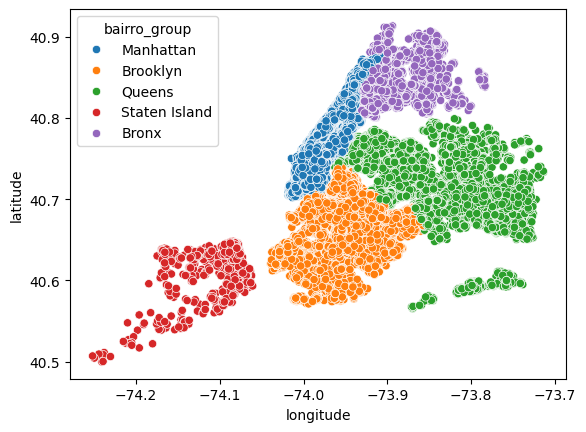

In [459]:
#viridis = palette=sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(df, x='longitude', y='latitude', hue='bairro_group')#hue='price', linewidth=0.1, palette=viridis)

## Treinamento e teste de modelos de ML